In [3]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Arc
from matplotlib.pyplot import figure

In [26]:
data = np.load("circles.npy")

In [27]:
data.min(axis=0), data.max(axis=0)

(array([3.16073590e-05, 1.27236613e-03]), array([0.99507221, 0.99983261]))

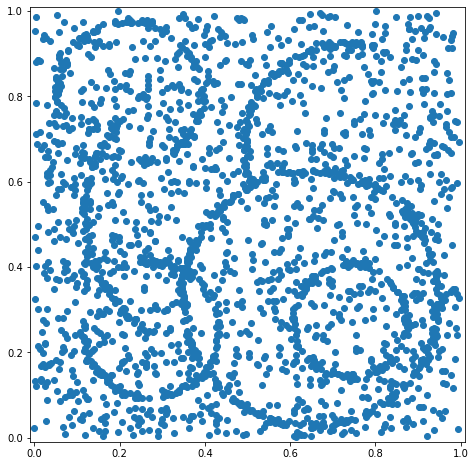

In [28]:
fig, ax = plt.subplots(figsize=(8,8))

plt.xlim(-0.01, 1.01)
plt.ylim(-0.01, 1.01)
plt.gca().set_aspect('equal', adjustable='box')
ax.scatter(*data.T)

plt.show()

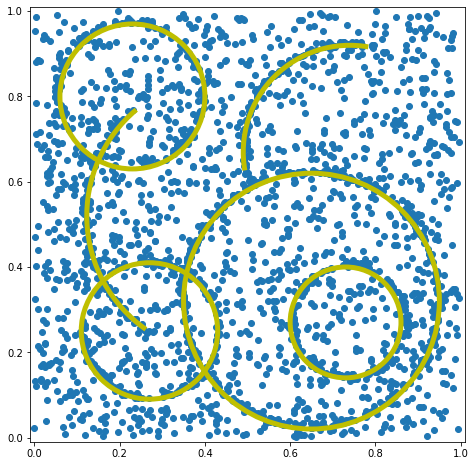

In [293]:
fig, ax = plt.subplots(figsize=(8,8))

plt.xlim(-0.01, 1.01)
plt.ylim(-0.01, 1.01)
plt.gca().set_aspect('equal', adjustable='box')
ax.scatter(*data.T)

color = "y"
linewidth = 5

ax.add_patch(Arc((.448, .52), .65, .65, theta1=130, theta2=235, color=color, linewidth=linewidth))
ax.add_patch(Arc((.74, .67), .5, .5, theta1=80, theta2=190, color=color, linewidth=linewidth))
ax.add_patch(plt.Circle((.23, .8), .17, fill=False, color=color, linewidth=linewidth))
ax.add_patch(plt.Circle((.27, .25), .16, fill=False, color=color, linewidth=linewidth))
ax.add_patch(plt.Circle((.65, .32), .3, fill=False, color=color, linewidth=linewidth))
ax.add_patch(plt.Circle((.73, .27), .13, fill=False, color=color, linewidth=linewidth))

plt.show()

In [220]:
def find_circle_touching_three_points(points):
    """This adapts the formular outlined here: https://en.wikipedia.org/wiki/Circumscribed_circle#Cartesian_coordinates
    It expects three points in R2, so dim(points) = 3x2
    """
    xs = points[:,0]
    ys = points[:,1]
    ones = np.ones(len(points))
    len_squared = np.linalg.norm(points, axis=1) ** 2

    S_x = .5 * np.linalg.det(np.vstack([len_squared, ys, ones]))
    S_y = .5 * np.linalg.det(np.vstack([xs, len_squared, ones]))
    a = np.linalg.det(np.vstack([xs, ys, ones]))
    b = np.linalg.det(np.vstack([xs, ys, len_squared]))

    S = np.array([S_x, S_y])
    center = S/a
    radius = np.sqrt((b / a ) + (np.linalg.norm(S) ** 2 / a ** 2))
    
    return np.hstack([center, radius])


def unpack_center_radius(cnr):
    center = cnr[[0,1]]
    radius = cnr[[2]]
    
    return center, radius

In [289]:
def circle_touching_three_points_vec(points):
    """This adapts the formular outlined here: https://en.wikipedia.org/wiki/Circumscribed_circle#Cartesian_coordinates
    It expects three points in R2, so dim(points) = 3x2
    """
    xs = points[:, :,0]
    ys = points[:, :,1]
    ones = np.ones(list(points.shape)[:2])
    len_squared = np.linalg.norm(points, axis=2) ** 2

    def stack(a, b, c):
        return np.hstack([a, b, c]).reshape((points.shape[0], 3, 3))
    
    
    S_x = .5 * np.linalg.det(stack(len_squared, ys, ones))
    S_y = .5 * np.linalg.det(stack(xs, len_squared, ones))
    a = np.linalg.det(stack(xs, ys, ones))
    b = np.linalg.det(stack(xs, ys, len_squared))

    S = np.array([S_x, S_y]).T
    center = S/a[:, None]
    radius = np.sqrt((b / a ) + (np.linalg.norm(S, axis=1) ** 2 / a ** 2))

    return np.vstack([center.T, radius]).T

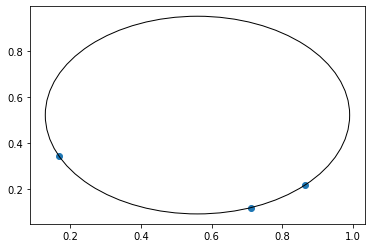

In [260]:
# test show that circle fitting 
#points = np.random.rand(3, 2)
#center, radius = unpack_center_radius(find_circle_touching_three_points(points))
points = R[0]
center, radius = unpack_center_radius(C[0])

plt.scatter(*points.T)
plt.gca().add_patch(plt.Circle(center, radius=radius, fill=False))
plt.show()

In [294]:
def ransac(data, number_of_circles, N, epsilon):
    """
        number_of_circles: number of circles to find
        N: iterations per circle
    """

    R = np.random.rand(N, 3, 2)
    C = circle_touching_three_points_vec(R)
    centers = C[:, :2]
    radius = C[:, 2]

    distances_to_centers = np.linalg.norm(data - centers[:, None, :], axis=2)
    distance_to_circle = np.abs(distances_to_centers - radius[:, None])
    inliers = (distance_to_circle < epsilon.sum(axis=1)
    
    best_circle_idx = inliers.argmax()
    best_circle = C[best_circle_idx]
    
    return best_circle

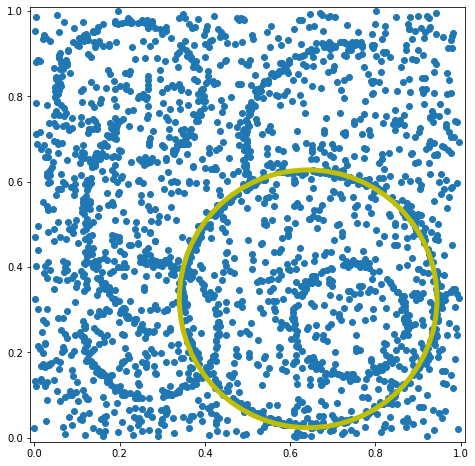

In [309]:
center, radius = unpack_center_radius(ransac(data, 1, 10_000, 0.001))

fig, ax = plt.subplots(figsize=(8,8))

plt.xlim(-0.01, 1.01)
plt.ylim(-0.01, 1.01)
plt.gca().set_aspect('equal', adjustable='box')
ax.scatter(*data.T)

color = "y"
linewidth = 5

ax.add_patch(plt.Circle(center, radius, fill=False, color=color, linewidth=linewidth))

plt.show()

In [43]:
center, radius = find_circle_touching_three_points(points)

In [62]:
np.vectorize(find_circle_touching_three_points)(R)

IndexError: invalid index to scalar variable.